In [1]:
!pip install ..

Processing /home/bpc/Documents/memorytools
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for memorytools: filename=memorytools-0.1.0-py3-none-any.whl size=9173 sha256=4b11d7889661237d838bb4bfc776fa06f4d193f8c77efac76275d065780db477
  Stored in directory: /tmp/pip-ephem-wheel-cache-2op446ua/wheels/83/d1/b0/5f5772eb16dc6152c130b096fab71055d247aea68ef4046965
Successfully built memorytools
  Attempting uninstall: memorytools
    Found existing installation: memorytools 0.1.0
    Uninstalling memorytools-0.1.0:
      Successfully uninstalled memorytools-0.1.0


In [2]:
import test_memory_monitor
from memorytools.memorymonitor import MemoryMonitor

# Test Server

The test server stored in [test/test_server.py](memorytools/test/test_server.py) provides an example program for development and testing of the memory monitor, it has the ability to act like a memory leaking process and a normal process that properly tidies up after itself. 

The test server provides a practical and controlled environment for developers to test the effectiveness of the memory monitor, ensuring it can accurately track memory usage and identify memory leaks


## Startup test server

In [3]:
import subprocess
import time

global PORT
PORT = 8130

#Spawn a test_server.py with Popen, yield and then kill it
proc = subprocess.Popen(["python3", "test_server.py"])
if(proc.poll() is not None):
    proc.kill()
    raise Exception("Test server failed to start")
time.sleep(5)

Serving at port 8130


In [4]:
proc.pid

149854

## Functions for interacting with the test server

In [5]:
import requests


def send_memory_request(server=None):
    response = requests.get(f"http://127.0.0.1:8130/addmem")
    assert response.status_code==200

def send_memory_clear_request(server=None):
    send_memory_request(server)
    response = requests.get(f"http://127.0.0.1:8130/clrmem")
    assert response.status_code==200


import time


# Simple memory leak 

Memory leak that shows simply increased memory usage over time, this is at a consistent rate with no major gaps either in the data or between increase in memory usage. A memory leak occurs when a program allocates memory but fails to release it, leading to a gradual increase in memory usage over time.

This case, where memory usage consistently increases without any major gaps in the data or between the increases, would be characteristic of a leak from a specific section of code that is allocating and then not releasng memory.

In [6]:
def simulate_memory_leak(server, duration=60):
    """
    Simulate a memory leak by continuously sending memory requests to a server.

    Parameters:
    server: The server to send the memory requests to.
    duration: The duration in seconds for which to simulate the memory leak, in seconds. Defaults to 60.
    """
    send_memory_clear_request(server)
    start_time = time.time()
    while time.time() - start_time < duration:
        send_memory_request(server)
        time.sleep(duration/50)  # Pause for a second between requests

In [7]:
#Parameters
from memorytools import memoryanalysis
from datetime import timedelta
import psutil as ps

memoryanalysis.WIN_MIN_NUM_POINTS_DETECT =  int(200) # points = 1s
memoryanalysis.WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 
memoryanalysis.RESAMPLE_MIN_WIN = timedelta(seconds=0.005).total_seconds() # 5ms
memoryanalysis.R_SQR_MIN = 0.9 #From paper
memoryanalysis.CRITICAL_TIME_MAX = 60*60*1 # 1 hours
memoryanalysis.CRITICAL_MEMORY_USAGE = ps.virtual_memory().total
memoryanalysis.MAX_TIME_DIFF = 0.5

In [8]:
mem_mon = MemoryMonitor(time_interval=0.05)
mem_mon.start_monitoring()

simulate_memory_leak(proc, 10)

mem_mon.stop_monitoring()

NO MEMORY DATA FILE FOUND
127.0.0.1 - - [10/May/2024 15:08:04] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:08:04] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:08:04] "GET /addmem HTTP/1.1" 200 -


0
Added memory
397320192
remove memory
0
Added memory
399314944
1
Added memory
408317952


127.0.0.1 - - [10/May/2024 15:08:04] "GET /addmem HTTP/1.1" 200 -


2
Added memory
417316864


127.0.0.1 - - [10/May/2024 15:08:05] "GET /addmem HTTP/1.1" 200 -


3
Added memory
425316352


127.0.0.1 - - [10/May/2024 15:08:05] "GET /addmem HTTP/1.1" 200 -


4
Added memory
433315840


127.0.0.1 - - [10/May/2024 15:08:05] "GET /addmem HTTP/1.1" 200 -


5
Added memory
441315328


127.0.0.1 - - [10/May/2024 15:08:05] "GET /addmem HTTP/1.1" 200 -


6
Added memory
449314816


127.0.0.1 - - [10/May/2024 15:08:05] "GET /addmem HTTP/1.1" 200 -


7
Added memory
457318400


127.0.0.1 - - [10/May/2024 15:08:06] "GET /addmem HTTP/1.1" 200 -


8
Added memory
465317888


127.0.0.1 - - [10/May/2024 15:08:06] "GET /addmem HTTP/1.1" 200 -


9
Added memory
473317376


127.0.0.1 - - [10/May/2024 15:08:06] "GET /addmem HTTP/1.1" 200 -


10
Added memory
481316864


127.0.0.1 - - [10/May/2024 15:08:06] "GET /addmem HTTP/1.1" 200 -


11
Added memory
489316352


127.0.0.1 - - [10/May/2024 15:08:07] "GET /addmem HTTP/1.1" 200 -


12
Added memory
497315840


127.0.0.1 - - [10/May/2024 15:08:07] "GET /addmem HTTP/1.1" 200 -


13
Added memory
505315328


127.0.0.1 - - [10/May/2024 15:08:07] "GET /addmem HTTP/1.1" 200 -


14
Added memory
513318912


127.0.0.1 - - [10/May/2024 15:08:07] "GET /addmem HTTP/1.1" 200 -


15
Added memory
521318400


127.0.0.1 - - [10/May/2024 15:08:07] "GET /addmem HTTP/1.1" 200 -


16
Added memory
529317888


127.0.0.1 - - [10/May/2024 15:08:08] "GET /addmem HTTP/1.1" 200 -


17
Added memory
537317376


127.0.0.1 - - [10/May/2024 15:08:08] "GET /addmem HTTP/1.1" 200 -


18
Added memory
545316864


127.0.0.1 - - [10/May/2024 15:08:08] "GET /addmem HTTP/1.1" 200 -


19
Added memory
553316352


127.0.0.1 - - [10/May/2024 15:08:08] "GET /addmem HTTP/1.1" 200 -


20
Added memory
561315840


127.0.0.1 - - [10/May/2024 15:08:08] "GET /addmem HTTP/1.1" 200 -


21
Added memory
569315328


127.0.0.1 - - [10/May/2024 15:08:09] "GET /addmem HTTP/1.1" 200 -


22
Added memory
577318912


127.0.0.1 - - [10/May/2024 15:08:09] "GET /addmem HTTP/1.1" 200 -


23
Added memory
585318400


127.0.0.1 - - [10/May/2024 15:08:09] "GET /addmem HTTP/1.1" 200 -


24
Added memory
593317888


127.0.0.1 - - [10/May/2024 15:08:09] "GET /addmem HTTP/1.1" 200 -


25
Added memory
601317376


127.0.0.1 - - [10/May/2024 15:08:09] "GET /addmem HTTP/1.1" 200 -


26
Added memory
609316864


127.0.0.1 - - [10/May/2024 15:08:10] "GET /addmem HTTP/1.1" 200 -


27
Added memory
617316352


127.0.0.1 - - [10/May/2024 15:08:10] "GET /addmem HTTP/1.1" 200 -


28
Added memory
625315840


127.0.0.1 - - [10/May/2024 15:08:10] "GET /addmem HTTP/1.1" 200 -


29
Added memory
633315328


127.0.0.1 - - [10/May/2024 15:08:10] "GET /addmem HTTP/1.1" 200 -


30
Added memory
641318912


127.0.0.1 - - [10/May/2024 15:08:10] "GET /addmem HTTP/1.1" 200 -


31
Added memory
649318400


127.0.0.1 - - [10/May/2024 15:08:11] "GET /addmem HTTP/1.1" 200 -


32
Added memory
657317888


127.0.0.1 - - [10/May/2024 15:08:11] "GET /addmem HTTP/1.1" 200 -


33
Added memory
665317376


127.0.0.1 - - [10/May/2024 15:08:11] "GET /addmem HTTP/1.1" 200 -


34
Added memory
673316864


127.0.0.1 - - [10/May/2024 15:08:11] "GET /addmem HTTP/1.1" 200 -


35
Added memory
681316352


127.0.0.1 - - [10/May/2024 15:08:12] "GET /addmem HTTP/1.1" 200 -


36
Added memory
689315840


127.0.0.1 - - [10/May/2024 15:08:12] "GET /addmem HTTP/1.1" 200 -


37
Added memory
697315328


127.0.0.1 - - [10/May/2024 15:08:12] "GET /addmem HTTP/1.1" 200 -


38
Added memory
705318912


127.0.0.1 - - [10/May/2024 15:08:12] "GET /addmem HTTP/1.1" 200 -


39
Added memory
713318400


127.0.0.1 - - [10/May/2024 15:08:12] "GET /addmem HTTP/1.1" 200 -


40
Added memory
721317888


127.0.0.1 - - [10/May/2024 15:08:13] "GET /addmem HTTP/1.1" 200 -


41
Added memory
729317376


127.0.0.1 - - [10/May/2024 15:08:13] "GET /addmem HTTP/1.1" 200 -


42
Added memory
737316864


127.0.0.1 - - [10/May/2024 15:08:13] "GET /addmem HTTP/1.1" 200 -


43
Added memory
745316352


127.0.0.1 - - [10/May/2024 15:08:13] "GET /addmem HTTP/1.1" 200 -


44
Added memory
753315840


127.0.0.1 - - [10/May/2024 15:08:13] "GET /addmem HTTP/1.1" 200 -


45
Added memory
761319424


127.0.0.1 - - [10/May/2024 15:08:14] "GET /addmem HTTP/1.1" 200 -


46
Added memory
769318912


127.0.0.1 - - [10/May/2024 15:08:14] "GET /addmem HTTP/1.1" 200 -


47
Added memory
777318400


127.0.0.1 - - [10/May/2024 15:08:14] "GET /addmem HTTP/1.1" 200 -


0.9001857519531696


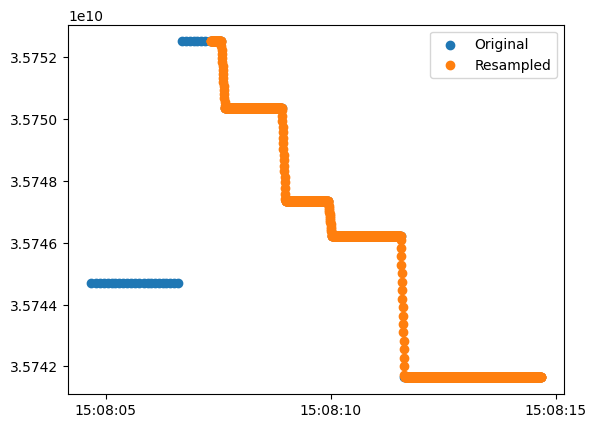

0.9793881345553074


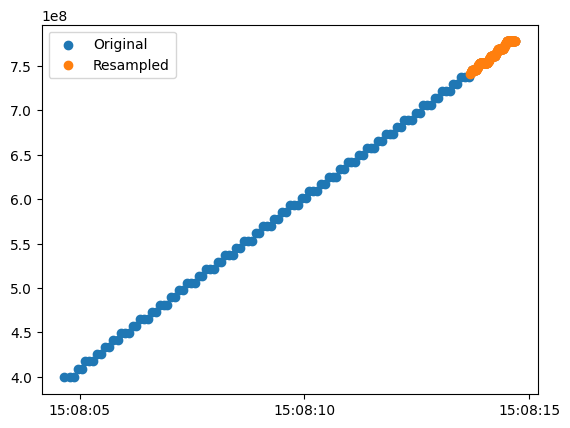

Abnormal memory usage detected in process: chromewith pid 5541
Abnormal memory usage detected in process: python3with pid 149854


(['python3', 'chrome'], [5541, 149854])
Time taken to detect memory leak: 58.89049243927002 seconds


In [9]:
import time
start_time = time.time()
print(mem_mon.detect_leaks("LBR"))
end_time = time.time() - start_time

print(f"Time taken to detect memory leak: {end_time} seconds")

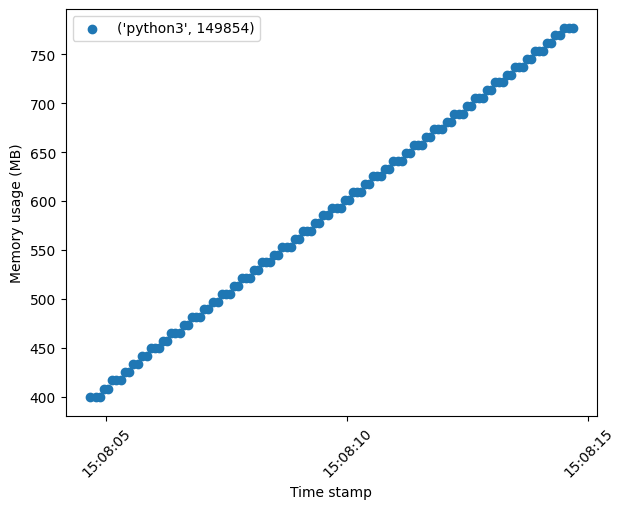

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [10]:
mem_mon.plot_data_to_screen([proc.pid])

In [11]:
# mem_mon.detect_leaks("LBRCPD")

# Sawtooth leak testing

A sawtooth memory leak refers to a specific type of memory leak that occurs when the memory usage of a program gradually increases over time, but periodically drops back down to a lower level before increasing again. This pattern resembles the teeth of a saw, hence the name "sawtooth."

Memory leaks occur when a program allocates memory but fails to release it when it is no longer needed. Over time, these unreleased memory blocks accumulate, leading to increased memory usage. In a sawtooth memory leak, the memory usage periodically drops coinciding with reboots or restarts of that application or module. It can be difficult to compare these shapes since garbage collection points/normal behaviour can also cause such a pattern and would show a healthy usage of the heap.

Sawtooth memory leaks can be particularly challenging to identify and fix because the periodic drops in memory usage can create the illusion that the leak is not present. However, the repeated trend of increasing memory usage over time indicates the presence of a leak that is not becoming problematic due to some form of resetting. In a lot of ESO software this resetting could be down to things like a process going to OFF.

In [12]:
def simulate_sawtooth_memory_leak(server):
    for _ in range(3): #60 seconds 
        simulate_memory_leak(server,10)
        send_memory_clear_request(server)

In [13]:
mem_mon_sawtooth = MemoryMonitor(time_interval=0.05)
mem_mon_sawtooth.start_monitoring()
# proc=None
simulate_sawtooth_memory_leak(proc)
mem_mon_sawtooth.stop_monitoring()

NO MEMORY DATA FILE FOUND
127.0.0.1 - - [10/May/2024 15:09:13] "GET /addmem HTTP/1.1" 200 -


48
Added memory
785317888


127.0.0.1 - - [10/May/2024 15:09:13] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:13] "GET /addmem HTTP/1.1" 200 -


remove memory
0
Added memory
407318528
1
Added memory
415318016


127.0.0.1 - - [10/May/2024 15:09:14] "GET /addmem HTTP/1.1" 200 -


2
Added memory
423317504


127.0.0.1 - - [10/May/2024 15:09:14] "GET /addmem HTTP/1.1" 200 -


3
Added memory
431316992


127.0.0.1 - - [10/May/2024 15:09:14] "GET /addmem HTTP/1.1" 200 -


4
Added memory
439316480


127.0.0.1 - - [10/May/2024 15:09:14] "GET /addmem HTTP/1.1" 200 -


5
Added memory
447315968


127.0.0.1 - - [10/May/2024 15:09:15] "GET /addmem HTTP/1.1" 200 -


6
Added memory
455315456


127.0.0.1 - - [10/May/2024 15:09:15] "GET /addmem HTTP/1.1" 200 -


7
Added memory
463319040


127.0.0.1 - - [10/May/2024 15:09:15] "GET /addmem HTTP/1.1" 200 -


8
Added memory
471318528


127.0.0.1 - - [10/May/2024 15:09:15] "GET /addmem HTTP/1.1" 200 -


9
Added memory
479318016


127.0.0.1 - - [10/May/2024 15:09:15] "GET /addmem HTTP/1.1" 200 -


10
Added memory
487317504


127.0.0.1 - - [10/May/2024 15:09:16] "GET /addmem HTTP/1.1" 200 -


11
Added memory
495316992


127.0.0.1 - - [10/May/2024 15:09:16] "GET /addmem HTTP/1.1" 200 -


12
Added memory
503316480


127.0.0.1 - - [10/May/2024 15:09:16] "GET /addmem HTTP/1.1" 200 -


13
Added memory
511315968


127.0.0.1 - - [10/May/2024 15:09:16] "GET /addmem HTTP/1.1" 200 -


14
Added memory
519319552


127.0.0.1 - - [10/May/2024 15:09:16] "GET /addmem HTTP/1.1" 200 -


15
Added memory
527319040


127.0.0.1 - - [10/May/2024 15:09:17] "GET /addmem HTTP/1.1" 200 -


16
Added memory
535318528


127.0.0.1 - - [10/May/2024 15:09:17] "GET /addmem HTTP/1.1" 200 -


17
Added memory
543318016


127.0.0.1 - - [10/May/2024 15:09:17] "GET /addmem HTTP/1.1" 200 -


18
Added memory
551317504


127.0.0.1 - - [10/May/2024 15:09:17] "GET /addmem HTTP/1.1" 200 -


19
Added memory
559316992


127.0.0.1 - - [10/May/2024 15:09:17] "GET /addmem HTTP/1.1" 200 -


20
Added memory
567316480


127.0.0.1 - - [10/May/2024 15:09:18] "GET /addmem HTTP/1.1" 200 -


21
Added memory
575315968


127.0.0.1 - - [10/May/2024 15:09:18] "GET /addmem HTTP/1.1" 200 -


22
Added memory
583319552


127.0.0.1 - - [10/May/2024 15:09:18] "GET /addmem HTTP/1.1" 200 -


23
Added memory
591319040


127.0.0.1 - - [10/May/2024 15:09:18] "GET /addmem HTTP/1.1" 200 -


24
Added memory
599318528


127.0.0.1 - - [10/May/2024 15:09:19] "GET /addmem HTTP/1.1" 200 -


25
Added memory
607318016


127.0.0.1 - - [10/May/2024 15:09:19] "GET /addmem HTTP/1.1" 200 -


26
Added memory
615317504


127.0.0.1 - - [10/May/2024 15:09:19] "GET /addmem HTTP/1.1" 200 -


27
Added memory
623316992


127.0.0.1 - - [10/May/2024 15:09:19] "GET /addmem HTTP/1.1" 200 -


28
Added memory
631316480


127.0.0.1 - - [10/May/2024 15:09:19] "GET /addmem HTTP/1.1" 200 -


29
Added memory
639315968


127.0.0.1 - - [10/May/2024 15:09:20] "GET /addmem HTTP/1.1" 200 -


30
Added memory
647319552


127.0.0.1 - - [10/May/2024 15:09:20] "GET /addmem HTTP/1.1" 200 -


31
Added memory
655319040


127.0.0.1 - - [10/May/2024 15:09:20] "GET /addmem HTTP/1.1" 200 -


32
Added memory
663318528


127.0.0.1 - - [10/May/2024 15:09:20] "GET /addmem HTTP/1.1" 200 -


33
Added memory
671318016


127.0.0.1 - - [10/May/2024 15:09:20] "GET /addmem HTTP/1.1" 200 -


34
Added memory
679317504


127.0.0.1 - - [10/May/2024 15:09:21] "GET /addmem HTTP/1.1" 200 -


35
Added memory
687316992


127.0.0.1 - - [10/May/2024 15:09:21] "GET /addmem HTTP/1.1" 200 -


36
Added memory
695316480


127.0.0.1 - - [10/May/2024 15:09:21] "GET /addmem HTTP/1.1" 200 -


37
Added memory
703315968


127.0.0.1 - - [10/May/2024 15:09:21] "GET /addmem HTTP/1.1" 200 -


38
Added memory
711319552


127.0.0.1 - - [10/May/2024 15:09:21] "GET /addmem HTTP/1.1" 200 -


39
Added memory
719319040


127.0.0.1 - - [10/May/2024 15:09:22] "GET /addmem HTTP/1.1" 200 -


40
Added memory
727318528


127.0.0.1 - - [10/May/2024 15:09:22] "GET /addmem HTTP/1.1" 200 -


41
Added memory
735318016


127.0.0.1 - - [10/May/2024 15:09:22] "GET /addmem HTTP/1.1" 200 -


42
Added memory
743317504


127.0.0.1 - - [10/May/2024 15:09:22] "GET /addmem HTTP/1.1" 200 -


43
Added memory
751316992


127.0.0.1 - - [10/May/2024 15:09:22] "GET /addmem HTTP/1.1" 200 -


44
Added memory
759316480


127.0.0.1 - - [10/May/2024 15:09:23] "GET /addmem HTTP/1.1" 200 -


45
Added memory
767320064


127.0.0.1 - - [10/May/2024 15:09:23] "GET /addmem HTTP/1.1" 200 -


46
Added memory
775319552


127.0.0.1 - - [10/May/2024 15:09:23] "GET /addmem HTTP/1.1" 200 -


47
Added memory
783319040


127.0.0.1 - - [10/May/2024 15:09:23] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528
remove memory
0
Added memory
407318528
remove memory
0
Added memory
407318528


127.0.0.1 - - [10/May/2024 15:09:24] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:24] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:24] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:24] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:24] "GET /addmem HTTP/1.1" 200 -


1
Added memory
415318016


127.0.0.1 - - [10/May/2024 15:09:24] "GET /addmem HTTP/1.1" 200 -


2
Added memory
423317504


127.0.0.1 - - [10/May/2024 15:09:24] "GET /addmem HTTP/1.1" 200 -


3
Added memory
431316992


127.0.0.1 - - [10/May/2024 15:09:24] "GET /addmem HTTP/1.1" 200 -


4
Added memory
439316480


127.0.0.1 - - [10/May/2024 15:09:24] "GET /addmem HTTP/1.1" 200 -


5
Added memory
447315968


127.0.0.1 - - [10/May/2024 15:09:25] "GET /addmem HTTP/1.1" 200 -


6
Added memory
455315456


127.0.0.1 - - [10/May/2024 15:09:25] "GET /addmem HTTP/1.1" 200 -


7
Added memory
463319040


127.0.0.1 - - [10/May/2024 15:09:25] "GET /addmem HTTP/1.1" 200 -


8
Added memory
471318528


127.0.0.1 - - [10/May/2024 15:09:25] "GET /addmem HTTP/1.1" 200 -


9
Added memory
479318016


127.0.0.1 - - [10/May/2024 15:09:26] "GET /addmem HTTP/1.1" 200 -


10
Added memory
487317504


127.0.0.1 - - [10/May/2024 15:09:26] "GET /addmem HTTP/1.1" 200 -


11
Added memory
495316992


127.0.0.1 - - [10/May/2024 15:09:26] "GET /addmem HTTP/1.1" 200 -


12
Added memory
503316480


127.0.0.1 - - [10/May/2024 15:09:26] "GET /addmem HTTP/1.1" 200 -


13
Added memory
511315968


127.0.0.1 - - [10/May/2024 15:09:26] "GET /addmem HTTP/1.1" 200 -


14
Added memory
519319552


127.0.0.1 - - [10/May/2024 15:09:27] "GET /addmem HTTP/1.1" 200 -


15
Added memory
527319040


127.0.0.1 - - [10/May/2024 15:09:27] "GET /addmem HTTP/1.1" 200 -


16
Added memory
535318528


127.0.0.1 - - [10/May/2024 15:09:27] "GET /addmem HTTP/1.1" 200 -


17
Added memory
543318016


127.0.0.1 - - [10/May/2024 15:09:27] "GET /addmem HTTP/1.1" 200 -


18
Added memory
551317504


127.0.0.1 - - [10/May/2024 15:09:27] "GET /addmem HTTP/1.1" 200 -


19
Added memory
559316992


127.0.0.1 - - [10/May/2024 15:09:28] "GET /addmem HTTP/1.1" 200 -


20
Added memory
567316480


127.0.0.1 - - [10/May/2024 15:09:28] "GET /addmem HTTP/1.1" 200 -


21
Added memory
575315968


127.0.0.1 - - [10/May/2024 15:09:28] "GET /addmem HTTP/1.1" 200 -


22
Added memory
583319552


127.0.0.1 - - [10/May/2024 15:09:28] "GET /addmem HTTP/1.1" 200 -


23
Added memory
591319040


127.0.0.1 - - [10/May/2024 15:09:28] "GET /addmem HTTP/1.1" 200 -


24
Added memory
599318528


127.0.0.1 - - [10/May/2024 15:09:29] "GET /addmem HTTP/1.1" 200 -


25
Added memory
607318016


127.0.0.1 - - [10/May/2024 15:09:29] "GET /addmem HTTP/1.1" 200 -


26
Added memory
615317504


127.0.0.1 - - [10/May/2024 15:09:29] "GET /addmem HTTP/1.1" 200 -


27
Added memory
623316992


127.0.0.1 - - [10/May/2024 15:09:29] "GET /addmem HTTP/1.1" 200 -


28
Added memory
631316480


127.0.0.1 - - [10/May/2024 15:09:29] "GET /addmem HTTP/1.1" 200 -


29
Added memory
639315968


127.0.0.1 - - [10/May/2024 15:09:30] "GET /addmem HTTP/1.1" 200 -


30
Added memory
647319552


127.0.0.1 - - [10/May/2024 15:09:30] "GET /addmem HTTP/1.1" 200 -


31
Added memory
655319040


127.0.0.1 - - [10/May/2024 15:09:30] "GET /addmem HTTP/1.1" 200 -


32
Added memory
663318528


127.0.0.1 - - [10/May/2024 15:09:30] "GET /addmem HTTP/1.1" 200 -


33
Added memory
671318016


127.0.0.1 - - [10/May/2024 15:09:31] "GET /addmem HTTP/1.1" 200 -


34
Added memory
679317504


127.0.0.1 - - [10/May/2024 15:09:31] "GET /addmem HTTP/1.1" 200 -


35
Added memory
687316992


127.0.0.1 - - [10/May/2024 15:09:31] "GET /addmem HTTP/1.1" 200 -


36
Added memory
695316480


127.0.0.1 - - [10/May/2024 15:09:31] "GET /addmem HTTP/1.1" 200 -


37
Added memory
703315968


127.0.0.1 - - [10/May/2024 15:09:31] "GET /addmem HTTP/1.1" 200 -


38
Added memory
711319552


127.0.0.1 - - [10/May/2024 15:09:32] "GET /addmem HTTP/1.1" 200 -


39
Added memory
719319040


127.0.0.1 - - [10/May/2024 15:09:32] "GET /addmem HTTP/1.1" 200 -


40
Added memory
727318528


127.0.0.1 - - [10/May/2024 15:09:32] "GET /addmem HTTP/1.1" 200 -


41
Added memory
735318016


127.0.0.1 - - [10/May/2024 15:09:32] "GET /addmem HTTP/1.1" 200 -


42
Added memory
743317504


127.0.0.1 - - [10/May/2024 15:09:32] "GET /addmem HTTP/1.1" 200 -


43
Added memory
751316992


127.0.0.1 - - [10/May/2024 15:09:33] "GET /addmem HTTP/1.1" 200 -


44
Added memory
759316480


127.0.0.1 - - [10/May/2024 15:09:33] "GET /addmem HTTP/1.1" 200 -


45
Added memory
767320064


127.0.0.1 - - [10/May/2024 15:09:33] "GET /addmem HTTP/1.1" 200 -


46
Added memory
775319552


127.0.0.1 - - [10/May/2024 15:09:33] "GET /addmem HTTP/1.1" 200 -


47
Added memory
783319040


127.0.0.1 - - [10/May/2024 15:09:33] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528
remove memory
0
Added memory
407318528
remove memory
0
Added memory
407318528


127.0.0.1 - - [10/May/2024 15:09:34] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:34] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:34] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:34] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:34] "GET /addmem HTTP/1.1" 200 -


1
Added memory
415318016


127.0.0.1 - - [10/May/2024 15:09:34] "GET /addmem HTTP/1.1" 200 -


2
Added memory
423317504


127.0.0.1 - - [10/May/2024 15:09:34] "GET /addmem HTTP/1.1" 200 -


3
Added memory
431316992


127.0.0.1 - - [10/May/2024 15:09:34] "GET /addmem HTTP/1.1" 200 -


4
Added memory
439316480


127.0.0.1 - - [10/May/2024 15:09:35] "GET /addmem HTTP/1.1" 200 -


5
Added memory
447315968


127.0.0.1 - - [10/May/2024 15:09:35] "GET /addmem HTTP/1.1" 200 -


6
Added memory
455315456


127.0.0.1 - - [10/May/2024 15:09:35] "GET /addmem HTTP/1.1" 200 -


7
Added memory
463319040


127.0.0.1 - - [10/May/2024 15:09:35] "GET /addmem HTTP/1.1" 200 -


8
Added memory
471318528


127.0.0.1 - - [10/May/2024 15:09:35] "GET /addmem HTTP/1.1" 200 -


9
Added memory
479318016


127.0.0.1 - - [10/May/2024 15:09:36] "GET /addmem HTTP/1.1" 200 -


10
Added memory
487317504


127.0.0.1 - - [10/May/2024 15:09:36] "GET /addmem HTTP/1.1" 200 -


11
Added memory
495316992


127.0.0.1 - - [10/May/2024 15:09:36] "GET /addmem HTTP/1.1" 200 -


12
Added memory
503316480


127.0.0.1 - - [10/May/2024 15:09:36] "GET /addmem HTTP/1.1" 200 -


13
Added memory
511315968


127.0.0.1 - - [10/May/2024 15:09:36] "GET /addmem HTTP/1.1" 200 -


14
Added memory
519319552


127.0.0.1 - - [10/May/2024 15:09:37] "GET /addmem HTTP/1.1" 200 -


15
Added memory
527319040


127.0.0.1 - - [10/May/2024 15:09:37] "GET /addmem HTTP/1.1" 200 -


16
Added memory
535318528


127.0.0.1 - - [10/May/2024 15:09:37] "GET /addmem HTTP/1.1" 200 -


17
Added memory
543318016


127.0.0.1 - - [10/May/2024 15:09:37] "GET /addmem HTTP/1.1" 200 -


18
Added memory
551317504


127.0.0.1 - - [10/May/2024 15:09:38] "GET /addmem HTTP/1.1" 200 -


19
Added memory
559316992


127.0.0.1 - - [10/May/2024 15:09:38] "GET /addmem HTTP/1.1" 200 -


20
Added memory
567316480


127.0.0.1 - - [10/May/2024 15:09:38] "GET /addmem HTTP/1.1" 200 -


21
Added memory
575315968


127.0.0.1 - - [10/May/2024 15:09:38] "GET /addmem HTTP/1.1" 200 -


22
Added memory
583319552


127.0.0.1 - - [10/May/2024 15:09:38] "GET /addmem HTTP/1.1" 200 -


23
Added memory
591319040


127.0.0.1 - - [10/May/2024 15:09:39] "GET /addmem HTTP/1.1" 200 -


24
Added memory
599318528


127.0.0.1 - - [10/May/2024 15:09:39] "GET /addmem HTTP/1.1" 200 -


25
Added memory
607318016


127.0.0.1 - - [10/May/2024 15:09:39] "GET /addmem HTTP/1.1" 200 -


26
Added memory
615317504


127.0.0.1 - - [10/May/2024 15:09:39] "GET /addmem HTTP/1.1" 200 -


27
Added memory
623316992


127.0.0.1 - - [10/May/2024 15:09:39] "GET /addmem HTTP/1.1" 200 -


28
Added memory
631316480


127.0.0.1 - - [10/May/2024 15:09:40] "GET /addmem HTTP/1.1" 200 -


29
Added memory
639315968


127.0.0.1 - - [10/May/2024 15:09:40] "GET /addmem HTTP/1.1" 200 -


30
Added memory
647319552


127.0.0.1 - - [10/May/2024 15:09:40] "GET /addmem HTTP/1.1" 200 -


31
Added memory
655319040


127.0.0.1 - - [10/May/2024 15:09:40] "GET /addmem HTTP/1.1" 200 -


32
Added memory
663318528


127.0.0.1 - - [10/May/2024 15:09:40] "GET /addmem HTTP/1.1" 200 -


33
Added memory
671318016


127.0.0.1 - - [10/May/2024 15:09:41] "GET /addmem HTTP/1.1" 200 -


34
Added memory
679317504


127.0.0.1 - - [10/May/2024 15:09:41] "GET /addmem HTTP/1.1" 200 -


35
Added memory
687316992


127.0.0.1 - - [10/May/2024 15:09:41] "GET /addmem HTTP/1.1" 200 -


36
Added memory
695316480


127.0.0.1 - - [10/May/2024 15:09:41] "GET /addmem HTTP/1.1" 200 -


37
Added memory
703315968


127.0.0.1 - - [10/May/2024 15:09:42] "GET /addmem HTTP/1.1" 200 -


38
Added memory
711319552


127.0.0.1 - - [10/May/2024 15:09:42] "GET /addmem HTTP/1.1" 200 -


39
Added memory
719319040


127.0.0.1 - - [10/May/2024 15:09:42] "GET /addmem HTTP/1.1" 200 -


40
Added memory
727318528


127.0.0.1 - - [10/May/2024 15:09:42] "GET /addmem HTTP/1.1" 200 -


41
Added memory
735318016


127.0.0.1 - - [10/May/2024 15:09:42] "GET /addmem HTTP/1.1" 200 -


42
Added memory
743317504


127.0.0.1 - - [10/May/2024 15:09:43] "GET /addmem HTTP/1.1" 200 -


43
Added memory
751316992


127.0.0.1 - - [10/May/2024 15:09:43] "GET /addmem HTTP/1.1" 200 -


44
Added memory
759316480


127.0.0.1 - - [10/May/2024 15:09:43] "GET /addmem HTTP/1.1" 200 -


45
Added memory
767320064


127.0.0.1 - - [10/May/2024 15:09:43] "GET /addmem HTTP/1.1" 200 -


46
Added memory
775319552


127.0.0.1 - - [10/May/2024 15:09:43] "GET /addmem HTTP/1.1" 200 -


47
Added memory
783319040


127.0.0.1 - - [10/May/2024 15:09:44] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528
remove memory


127.0.0.1 - - [10/May/2024 15:09:44] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:09:44] "GET /clrmem HTTP/1.1" 200 -


0.9000308242602154


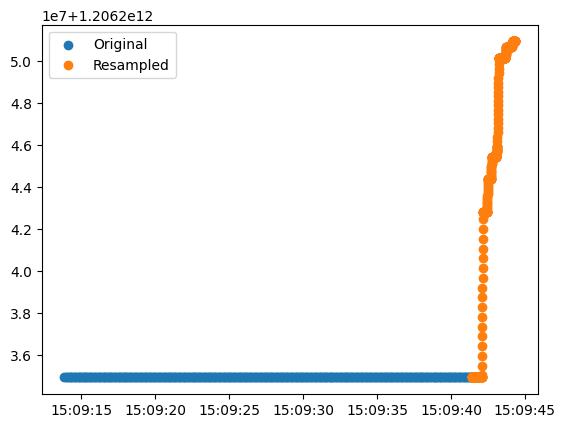

0.9003180428107983


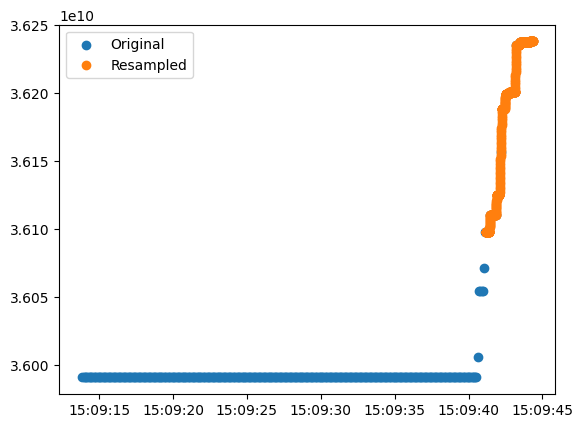

0.9000530701665684


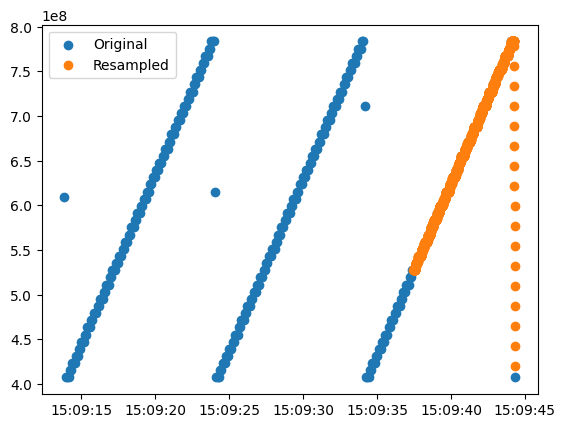

Abnormal memory usage detected in process: codewith pid 7937
Abnormal memory usage detected in process: python3with pid 149854
Abnormal memory usage detected in process: codewith pid 7983


(['python3', 'code'], [7937, 149854, 7983])

In [14]:
mem_mon_sawtooth.detect_leaks("LBR")

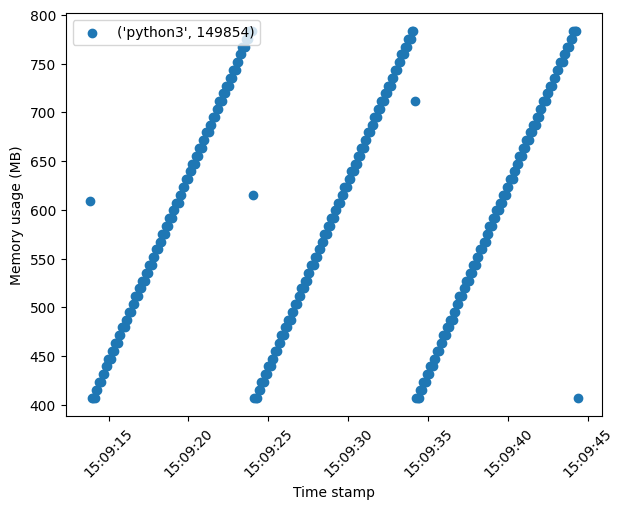

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [15]:
# %matplotlib widget
mem_mon_sawtooth.plot_data_to_screen([proc.pid])

# Testing data with Gaps
The MemoryAnalysis class in the memorytools/memoryanalysis.py file includes a gap filtering process as a part of the preprocessing of data. This process is necessary because the MemoryMonitor does not necessarily run continuously, it starts and stops with the unit tests. Despite this, the data is still held in the same structure since in an ideal world the time between unit tests would be neglible although realistically it is not. The gap filtering process ensures that the analysis does not resample and create windows that include a large temporal gap in recorded memory information. Data with such gaps is not reliable when resampled and should be considered a separate dataset for the analysis purposes. The process works by finding gaps above a threshold in the data (MAX_TIME_DIFF) and splitting the data into separate datasets at these gaps. We then apply a resampling on the data between gaps

In [19]:
mem_mon_gaps = MemoryMonitor(time_interval=0.05)
mem_mon_gaps.start_monitoring()
simulate_sawtooth_memory_leak(proc)

# Create a gap in our memory recording
mem_mon_gaps.stop_monitoring()

time.sleep(10)

mem_mon_gaps.start_monitoring()

#Back to memory monitoring!

simulate_memory_leak(proc,10)
mem_mon_gaps.stop_monitoring()  

NO MEMORY DATA FILE FOUND
127.0.0.1 - - [10/May/2024 15:47:38] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:38] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:38] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528
remove memory
0
Added memory
407318528
1
Added memory
415318016


127.0.0.1 - - [10/May/2024 15:47:39] "GET /addmem HTTP/1.1" 200 -


2
Added memory
423317504


127.0.0.1 - - [10/May/2024 15:47:39] "GET /addmem HTTP/1.1" 200 -


3
Added memory
431316992


127.0.0.1 - - [10/May/2024 15:47:39] "GET /addmem HTTP/1.1" 200 -


4
Added memory
439316480


127.0.0.1 - - [10/May/2024 15:47:39] "GET /addmem HTTP/1.1" 200 -


5
Added memory
447315968


127.0.0.1 - - [10/May/2024 15:47:39] "GET /addmem HTTP/1.1" 200 -


6
Added memory
455315456


127.0.0.1 - - [10/May/2024 15:47:40] "GET /addmem HTTP/1.1" 200 -


7
Added memory
463319040


127.0.0.1 - - [10/May/2024 15:47:40] "GET /addmem HTTP/1.1" 200 -


8
Added memory
471318528


127.0.0.1 - - [10/May/2024 15:47:40] "GET /addmem HTTP/1.1" 200 -


9
Added memory
479318016


127.0.0.1 - - [10/May/2024 15:47:40] "GET /addmem HTTP/1.1" 200 -


10
Added memory
487317504


127.0.0.1 - - [10/May/2024 15:47:40] "GET /addmem HTTP/1.1" 200 -


11
Added memory
495316992


127.0.0.1 - - [10/May/2024 15:47:41] "GET /addmem HTTP/1.1" 200 -


12
Added memory
503316480


127.0.0.1 - - [10/May/2024 15:47:41] "GET /addmem HTTP/1.1" 200 -


13
Added memory
511315968


127.0.0.1 - - [10/May/2024 15:47:41] "GET /addmem HTTP/1.1" 200 -


14
Added memory
519319552


127.0.0.1 - - [10/May/2024 15:47:41] "GET /addmem HTTP/1.1" 200 -


15
Added memory
527319040


127.0.0.1 - - [10/May/2024 15:47:41] "GET /addmem HTTP/1.1" 200 -


16
Added memory
535318528


127.0.0.1 - - [10/May/2024 15:47:42] "GET /addmem HTTP/1.1" 200 -


17
Added memory
543318016


127.0.0.1 - - [10/May/2024 15:47:42] "GET /addmem HTTP/1.1" 200 -


18
Added memory
551317504


127.0.0.1 - - [10/May/2024 15:47:42] "GET /addmem HTTP/1.1" 200 -


19
Added memory
559316992


127.0.0.1 - - [10/May/2024 15:47:42] "GET /addmem HTTP/1.1" 200 -


20
Added memory
567316480


127.0.0.1 - - [10/May/2024 15:47:42] "GET /addmem HTTP/1.1" 200 -


21
Added memory
575315968


127.0.0.1 - - [10/May/2024 15:47:43] "GET /addmem HTTP/1.1" 200 -


22
Added memory
583319552


127.0.0.1 - - [10/May/2024 15:47:43] "GET /addmem HTTP/1.1" 200 -


23
Added memory
591319040


127.0.0.1 - - [10/May/2024 15:47:43] "GET /addmem HTTP/1.1" 200 -


24
Added memory
599318528


127.0.0.1 - - [10/May/2024 15:47:43] "GET /addmem HTTP/1.1" 200 -


25
Added memory
607318016


127.0.0.1 - - [10/May/2024 15:47:43] "GET /addmem HTTP/1.1" 200 -


26
Added memory
615317504


127.0.0.1 - - [10/May/2024 15:47:44] "GET /addmem HTTP/1.1" 200 -


27
Added memory
623316992


127.0.0.1 - - [10/May/2024 15:47:44] "GET /addmem HTTP/1.1" 200 -


28
Added memory
631316480


127.0.0.1 - - [10/May/2024 15:47:44] "GET /addmem HTTP/1.1" 200 -


29
Added memory
639315968


127.0.0.1 - - [10/May/2024 15:47:44] "GET /addmem HTTP/1.1" 200 -


30
Added memory
647319552


127.0.0.1 - - [10/May/2024 15:47:45] "GET /addmem HTTP/1.1" 200 -


31
Added memory
655319040


127.0.0.1 - - [10/May/2024 15:47:45] "GET /addmem HTTP/1.1" 200 -


32
Added memory
663318528


127.0.0.1 - - [10/May/2024 15:47:45] "GET /addmem HTTP/1.1" 200 -


33
Added memory
671318016


127.0.0.1 - - [10/May/2024 15:47:45] "GET /addmem HTTP/1.1" 200 -


34
Added memory
679317504


127.0.0.1 - - [10/May/2024 15:47:45] "GET /addmem HTTP/1.1" 200 -


35
Added memory
687316992


127.0.0.1 - - [10/May/2024 15:47:46] "GET /addmem HTTP/1.1" 200 -


36
Added memory
695316480


127.0.0.1 - - [10/May/2024 15:47:46] "GET /addmem HTTP/1.1" 200 -


37
Added memory
703315968


127.0.0.1 - - [10/May/2024 15:47:46] "GET /addmem HTTP/1.1" 200 -


38
Added memory
711319552


127.0.0.1 - - [10/May/2024 15:47:46] "GET /addmem HTTP/1.1" 200 -


39
Added memory
719319040


127.0.0.1 - - [10/May/2024 15:47:46] "GET /addmem HTTP/1.1" 200 -


40
Added memory
727318528


127.0.0.1 - - [10/May/2024 15:47:47] "GET /addmem HTTP/1.1" 200 -


41
Added memory
735318016


127.0.0.1 - - [10/May/2024 15:47:47] "GET /addmem HTTP/1.1" 200 -


42
Added memory
743317504


127.0.0.1 - - [10/May/2024 15:47:47] "GET /addmem HTTP/1.1" 200 -


43
Added memory
751316992


127.0.0.1 - - [10/May/2024 15:47:47] "GET /addmem HTTP/1.1" 200 -


44
Added memory
759316480


127.0.0.1 - - [10/May/2024 15:47:47] "GET /addmem HTTP/1.1" 200 -


45
Added memory
767320064


127.0.0.1 - - [10/May/2024 15:47:48] "GET /addmem HTTP/1.1" 200 -


46
Added memory
775319552


127.0.0.1 - - [10/May/2024 15:47:48] "GET /addmem HTTP/1.1" 200 -


47
Added memory
783319040


127.0.0.1 - - [10/May/2024 15:47:48] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528


127.0.0.1 - - [10/May/2024 15:47:48] "GET /addmem HTTP/1.1" 200 -


49
Added memory
799318016
remove memory
0
Added memory
407318528
remove memory
0
Added memory
407318528


127.0.0.1 - - [10/May/2024 15:47:48] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:49] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:49] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:49] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:49] "GET /addmem HTTP/1.1" 200 -


1
Added memory
415318016


127.0.0.1 - - [10/May/2024 15:47:49] "GET /addmem HTTP/1.1" 200 -


2
Added memory
423317504


127.0.0.1 - - [10/May/2024 15:47:49] "GET /addmem HTTP/1.1" 200 -


3
Added memory
431316992


127.0.0.1 - - [10/May/2024 15:47:49] "GET /addmem HTTP/1.1" 200 -


4
Added memory
439316480


127.0.0.1 - - [10/May/2024 15:47:49] "GET /addmem HTTP/1.1" 200 -


5
Added memory
447315968


127.0.0.1 - - [10/May/2024 15:47:50] "GET /addmem HTTP/1.1" 200 -


6
Added memory
455315456


127.0.0.1 - - [10/May/2024 15:47:50] "GET /addmem HTTP/1.1" 200 -


7
Added memory
463319040


127.0.0.1 - - [10/May/2024 15:47:50] "GET /addmem HTTP/1.1" 200 -


8
Added memory
471318528


127.0.0.1 - - [10/May/2024 15:47:50] "GET /addmem HTTP/1.1" 200 -


9
Added memory
479318016


127.0.0.1 - - [10/May/2024 15:47:50] "GET /addmem HTTP/1.1" 200 -


10
Added memory
487317504


127.0.0.1 - - [10/May/2024 15:47:51] "GET /addmem HTTP/1.1" 200 -


11
Added memory
495316992


127.0.0.1 - - [10/May/2024 15:47:51] "GET /addmem HTTP/1.1" 200 -


12
Added memory
503316480


127.0.0.1 - - [10/May/2024 15:47:51] "GET /addmem HTTP/1.1" 200 -


13
Added memory
511315968


127.0.0.1 - - [10/May/2024 15:47:51] "GET /addmem HTTP/1.1" 200 -


14
Added memory
519319552


127.0.0.1 - - [10/May/2024 15:47:51] "GET /addmem HTTP/1.1" 200 -


15
Added memory
527319040


127.0.0.1 - - [10/May/2024 15:47:52] "GET /addmem HTTP/1.1" 200 -


16
Added memory
535318528


127.0.0.1 - - [10/May/2024 15:47:52] "GET /addmem HTTP/1.1" 200 -


17
Added memory
543318016


127.0.0.1 - - [10/May/2024 15:47:52] "GET /addmem HTTP/1.1" 200 -


18
Added memory
551317504


127.0.0.1 - - [10/May/2024 15:47:52] "GET /addmem HTTP/1.1" 200 -


19
Added memory
559316992


127.0.0.1 - - [10/May/2024 15:47:52] "GET /addmem HTTP/1.1" 200 -


20
Added memory
567316480


127.0.0.1 - - [10/May/2024 15:47:53] "GET /addmem HTTP/1.1" 200 -


21
Added memory
575315968


127.0.0.1 - - [10/May/2024 15:47:53] "GET /addmem HTTP/1.1" 200 -


22
Added memory
583319552


127.0.0.1 - - [10/May/2024 15:47:53] "GET /addmem HTTP/1.1" 200 -


23
Added memory
591319040


127.0.0.1 - - [10/May/2024 15:47:53] "GET /addmem HTTP/1.1" 200 -


24
Added memory
599318528


127.0.0.1 - - [10/May/2024 15:47:53] "GET /addmem HTTP/1.1" 200 -


25
Added memory
607318016


127.0.0.1 - - [10/May/2024 15:47:54] "GET /addmem HTTP/1.1" 200 -


26
Added memory
615317504


127.0.0.1 - - [10/May/2024 15:47:54] "GET /addmem HTTP/1.1" 200 -


27
Added memory
623316992


127.0.0.1 - - [10/May/2024 15:47:54] "GET /addmem HTTP/1.1" 200 -


28
Added memory
631316480


127.0.0.1 - - [10/May/2024 15:47:54] "GET /addmem HTTP/1.1" 200 -


29
Added memory
639315968


127.0.0.1 - - [10/May/2024 15:47:55] "GET /addmem HTTP/1.1" 200 -


30
Added memory
647319552


127.0.0.1 - - [10/May/2024 15:47:55] "GET /addmem HTTP/1.1" 200 -


31
Added memory
655319040


127.0.0.1 - - [10/May/2024 15:47:55] "GET /addmem HTTP/1.1" 200 -


32
Added memory
663318528


127.0.0.1 - - [10/May/2024 15:47:55] "GET /addmem HTTP/1.1" 200 -


33
Added memory
671318016


127.0.0.1 - - [10/May/2024 15:47:55] "GET /addmem HTTP/1.1" 200 -


34
Added memory
679317504


127.0.0.1 - - [10/May/2024 15:47:56] "GET /addmem HTTP/1.1" 200 -


35
Added memory
687316992


127.0.0.1 - - [10/May/2024 15:47:56] "GET /addmem HTTP/1.1" 200 -


36
Added memory
695316480


127.0.0.1 - - [10/May/2024 15:47:56] "GET /addmem HTTP/1.1" 200 -


37
Added memory
703315968


127.0.0.1 - - [10/May/2024 15:47:56] "GET /addmem HTTP/1.1" 200 -


38
Added memory
711319552


127.0.0.1 - - [10/May/2024 15:47:56] "GET /addmem HTTP/1.1" 200 -


39
Added memory
719319040


127.0.0.1 - - [10/May/2024 15:47:57] "GET /addmem HTTP/1.1" 200 -


40
Added memory
727318528


127.0.0.1 - - [10/May/2024 15:47:57] "GET /addmem HTTP/1.1" 200 -


41
Added memory
735318016


127.0.0.1 - - [10/May/2024 15:47:57] "GET /addmem HTTP/1.1" 200 -


42
Added memory
743317504


127.0.0.1 - - [10/May/2024 15:47:57] "GET /addmem HTTP/1.1" 200 -


43
Added memory
751316992


127.0.0.1 - - [10/May/2024 15:47:57] "GET /addmem HTTP/1.1" 200 -


44
Added memory
759316480


127.0.0.1 - - [10/May/2024 15:47:58] "GET /addmem HTTP/1.1" 200 -


45
Added memory
767320064


127.0.0.1 - - [10/May/2024 15:47:58] "GET /addmem HTTP/1.1" 200 -


46
Added memory
775319552


127.0.0.1 - - [10/May/2024 15:47:58] "GET /addmem HTTP/1.1" 200 -


47
Added memory
783319040


127.0.0.1 - - [10/May/2024 15:47:58] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528


127.0.0.1 - - [10/May/2024 15:47:58] "GET /addmem HTTP/1.1" 200 -


49
Added memory
799318016
remove memory
0
Added memory
407318528
remove memory
0
Added memory
407318528


127.0.0.1 - - [10/May/2024 15:47:59] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:59] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:59] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:59] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:47:59] "GET /addmem HTTP/1.1" 200 -


1
Added memory
415318016


127.0.0.1 - - [10/May/2024 15:47:59] "GET /addmem HTTP/1.1" 200 -


2
Added memory
423317504


127.0.0.1 - - [10/May/2024 15:47:59] "GET /addmem HTTP/1.1" 200 -


3
Added memory
431316992


127.0.0.1 - - [10/May/2024 15:47:59] "GET /addmem HTTP/1.1" 200 -


4
Added memory
439316480


127.0.0.1 - - [10/May/2024 15:48:00] "GET /addmem HTTP/1.1" 200 -


5
Added memory
447315968


127.0.0.1 - - [10/May/2024 15:48:00] "GET /addmem HTTP/1.1" 200 -


6
Added memory
455315456


127.0.0.1 - - [10/May/2024 15:48:00] "GET /addmem HTTP/1.1" 200 -


7
Added memory
463319040


127.0.0.1 - - [10/May/2024 15:48:00] "GET /addmem HTTP/1.1" 200 -


8
Added memory
471318528


127.0.0.1 - - [10/May/2024 15:48:00] "GET /addmem HTTP/1.1" 200 -


9
Added memory
479318016


127.0.0.1 - - [10/May/2024 15:48:01] "GET /addmem HTTP/1.1" 200 -


10
Added memory
487317504


127.0.0.1 - - [10/May/2024 15:48:01] "GET /addmem HTTP/1.1" 200 -


11
Added memory
495316992


127.0.0.1 - - [10/May/2024 15:48:01] "GET /addmem HTTP/1.1" 200 -


12
Added memory
503316480


127.0.0.1 - - [10/May/2024 15:48:01] "GET /addmem HTTP/1.1" 200 -


13
Added memory
511315968


127.0.0.1 - - [10/May/2024 15:48:01] "GET /addmem HTTP/1.1" 200 -


14
Added memory
519319552


127.0.0.1 - - [10/May/2024 15:48:02] "GET /addmem HTTP/1.1" 200 -


15
Added memory
527319040


127.0.0.1 - - [10/May/2024 15:48:02] "GET /addmem HTTP/1.1" 200 -


16
Added memory
535318528


127.0.0.1 - - [10/May/2024 15:48:02] "GET /addmem HTTP/1.1" 200 -


17
Added memory
543318016


127.0.0.1 - - [10/May/2024 15:48:02] "GET /addmem HTTP/1.1" 200 -


18
Added memory
551317504


127.0.0.1 - - [10/May/2024 15:48:02] "GET /addmem HTTP/1.1" 200 -


19
Added memory
559316992


127.0.0.1 - - [10/May/2024 15:48:03] "GET /addmem HTTP/1.1" 200 -


20
Added memory
567316480


127.0.0.1 - - [10/May/2024 15:48:03] "GET /addmem HTTP/1.1" 200 -


21
Added memory
575315968


127.0.0.1 - - [10/May/2024 15:48:03] "GET /addmem HTTP/1.1" 200 -


22
Added memory
583319552


127.0.0.1 - - [10/May/2024 15:48:03] "GET /addmem HTTP/1.1" 200 -


23
Added memory
591319040


127.0.0.1 - - [10/May/2024 15:48:04] "GET /addmem HTTP/1.1" 200 -


24
Added memory
599318528


127.0.0.1 - - [10/May/2024 15:48:04] "GET /addmem HTTP/1.1" 200 -


25
Added memory
607318016


127.0.0.1 - - [10/May/2024 15:48:04] "GET /addmem HTTP/1.1" 200 -


26
Added memory
615317504


127.0.0.1 - - [10/May/2024 15:48:04] "GET /addmem HTTP/1.1" 200 -


27
Added memory
623316992


127.0.0.1 - - [10/May/2024 15:48:04] "GET /addmem HTTP/1.1" 200 -


28
Added memory
631316480


127.0.0.1 - - [10/May/2024 15:48:05] "GET /addmem HTTP/1.1" 200 -


29
Added memory
639315968


127.0.0.1 - - [10/May/2024 15:48:05] "GET /addmem HTTP/1.1" 200 -


30
Added memory
647319552


127.0.0.1 - - [10/May/2024 15:48:05] "GET /addmem HTTP/1.1" 200 -


31
Added memory
655319040


127.0.0.1 - - [10/May/2024 15:48:05] "GET /addmem HTTP/1.1" 200 -


32
Added memory
663318528


127.0.0.1 - - [10/May/2024 15:48:05] "GET /addmem HTTP/1.1" 200 -


33
Added memory
671318016


127.0.0.1 - - [10/May/2024 15:48:06] "GET /addmem HTTP/1.1" 200 -


34
Added memory
679317504


127.0.0.1 - - [10/May/2024 15:48:06] "GET /addmem HTTP/1.1" 200 -


35
Added memory
687316992


127.0.0.1 - - [10/May/2024 15:48:06] "GET /addmem HTTP/1.1" 200 -


36
Added memory
695316480


127.0.0.1 - - [10/May/2024 15:48:06] "GET /addmem HTTP/1.1" 200 -


37
Added memory
703315968


127.0.0.1 - - [10/May/2024 15:48:06] "GET /addmem HTTP/1.1" 200 -


38
Added memory
711319552


127.0.0.1 - - [10/May/2024 15:48:07] "GET /addmem HTTP/1.1" 200 -


39
Added memory
719319040


127.0.0.1 - - [10/May/2024 15:48:07] "GET /addmem HTTP/1.1" 200 -


40
Added memory
727318528


127.0.0.1 - - [10/May/2024 15:48:07] "GET /addmem HTTP/1.1" 200 -


41
Added memory
735318016


127.0.0.1 - - [10/May/2024 15:48:07] "GET /addmem HTTP/1.1" 200 -


42
Added memory
743317504


127.0.0.1 - - [10/May/2024 15:48:07] "GET /addmem HTTP/1.1" 200 -


43
Added memory
751316992


127.0.0.1 - - [10/May/2024 15:48:08] "GET /addmem HTTP/1.1" 200 -


44
Added memory
759316480


127.0.0.1 - - [10/May/2024 15:48:08] "GET /addmem HTTP/1.1" 200 -


45
Added memory
767320064


127.0.0.1 - - [10/May/2024 15:48:08] "GET /addmem HTTP/1.1" 200 -


46
Added memory
775319552


127.0.0.1 - - [10/May/2024 15:48:08] "GET /addmem HTTP/1.1" 200 -


47
Added memory
783319040


127.0.0.1 - - [10/May/2024 15:48:08] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528


127.0.0.1 - - [10/May/2024 15:48:09] "GET /addmem HTTP/1.1" 200 -


49
Added memory
799318016
remove memory


127.0.0.1 - - [10/May/2024 15:48:09] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:48:09] "GET /clrmem HTTP/1.1" 200 -


0
Added memory
407318528
remove memory
0
Added memory
407318528


127.0.0.1 - - [10/May/2024 15:48:19] "GET /addmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:48:19] "GET /clrmem HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2024 15:48:19] "GET /addmem HTTP/1.1" 200 -


1
Added memory
415318016


127.0.0.1 - - [10/May/2024 15:48:19] "GET /addmem HTTP/1.1" 200 -


2
Added memory
423317504


127.0.0.1 - - [10/May/2024 15:48:19] "GET /addmem HTTP/1.1" 200 -


3
Added memory
431316992


127.0.0.1 - - [10/May/2024 15:48:20] "GET /addmem HTTP/1.1" 200 -


4
Added memory
439316480


127.0.0.1 - - [10/May/2024 15:48:20] "GET /addmem HTTP/1.1" 200 -


5
Added memory
447315968


127.0.0.1 - - [10/May/2024 15:48:20] "GET /addmem HTTP/1.1" 200 -


6
Added memory
455315456


127.0.0.1 - - [10/May/2024 15:48:20] "GET /addmem HTTP/1.1" 200 -


7
Added memory
463319040


127.0.0.1 - - [10/May/2024 15:48:20] "GET /addmem HTTP/1.1" 200 -


8
Added memory
471318528


127.0.0.1 - - [10/May/2024 15:48:21] "GET /addmem HTTP/1.1" 200 -


9
Added memory
479318016


127.0.0.1 - - [10/May/2024 15:48:21] "GET /addmem HTTP/1.1" 200 -


10
Added memory
487317504


127.0.0.1 - - [10/May/2024 15:48:21] "GET /addmem HTTP/1.1" 200 -


11
Added memory
495316992


127.0.0.1 - - [10/May/2024 15:48:21] "GET /addmem HTTP/1.1" 200 -


12
Added memory
503316480


127.0.0.1 - - [10/May/2024 15:48:22] "GET /addmem HTTP/1.1" 200 -


13
Added memory
511315968


127.0.0.1 - - [10/May/2024 15:48:22] "GET /addmem HTTP/1.1" 200 -


14
Added memory
519319552


127.0.0.1 - - [10/May/2024 15:48:22] "GET /addmem HTTP/1.1" 200 -


15
Added memory
527319040


127.0.0.1 - - [10/May/2024 15:48:22] "GET /addmem HTTP/1.1" 200 -


16
Added memory
535318528


127.0.0.1 - - [10/May/2024 15:48:22] "GET /addmem HTTP/1.1" 200 -


17
Added memory
543318016


127.0.0.1 - - [10/May/2024 15:48:23] "GET /addmem HTTP/1.1" 200 -


18
Added memory
551317504


127.0.0.1 - - [10/May/2024 15:48:23] "GET /addmem HTTP/1.1" 200 -


19
Added memory
559316992


127.0.0.1 - - [10/May/2024 15:48:23] "GET /addmem HTTP/1.1" 200 -


20
Added memory
567316480


127.0.0.1 - - [10/May/2024 15:48:23] "GET /addmem HTTP/1.1" 200 -


21
Added memory
575315968


127.0.0.1 - - [10/May/2024 15:48:23] "GET /addmem HTTP/1.1" 200 -


22
Added memory
583319552


127.0.0.1 - - [10/May/2024 15:48:24] "GET /addmem HTTP/1.1" 200 -


23
Added memory
591319040


127.0.0.1 - - [10/May/2024 15:48:24] "GET /addmem HTTP/1.1" 200 -


24
Added memory
599318528


127.0.0.1 - - [10/May/2024 15:48:24] "GET /addmem HTTP/1.1" 200 -


25
Added memory
607318016


127.0.0.1 - - [10/May/2024 15:48:24] "GET /addmem HTTP/1.1" 200 -


26
Added memory
615317504


127.0.0.1 - - [10/May/2024 15:48:24] "GET /addmem HTTP/1.1" 200 -


27
Added memory
623316992


127.0.0.1 - - [10/May/2024 15:48:25] "GET /addmem HTTP/1.1" 200 -


28
Added memory
631316480


127.0.0.1 - - [10/May/2024 15:48:25] "GET /addmem HTTP/1.1" 200 -


29
Added memory
639315968


127.0.0.1 - - [10/May/2024 15:48:25] "GET /addmem HTTP/1.1" 200 -


30
Added memory
647319552


127.0.0.1 - - [10/May/2024 15:48:25] "GET /addmem HTTP/1.1" 200 -


31
Added memory
655319040


127.0.0.1 - - [10/May/2024 15:48:25] "GET /addmem HTTP/1.1" 200 -


32
Added memory
663318528


127.0.0.1 - - [10/May/2024 15:48:26] "GET /addmem HTTP/1.1" 200 -


33
Added memory
671318016


127.0.0.1 - - [10/May/2024 15:48:26] "GET /addmem HTTP/1.1" 200 -


34
Added memory
679317504


127.0.0.1 - - [10/May/2024 15:48:26] "GET /addmem HTTP/1.1" 200 -


35
Added memory
687316992


127.0.0.1 - - [10/May/2024 15:48:26] "GET /addmem HTTP/1.1" 200 -


36
Added memory
695316480


127.0.0.1 - - [10/May/2024 15:48:26] "GET /addmem HTTP/1.1" 200 -


37
Added memory
703315968


127.0.0.1 - - [10/May/2024 15:48:27] "GET /addmem HTTP/1.1" 200 -


38
Added memory
711319552


127.0.0.1 - - [10/May/2024 15:48:27] "GET /addmem HTTP/1.1" 200 -


39
Added memory
719319040


127.0.0.1 - - [10/May/2024 15:48:27] "GET /addmem HTTP/1.1" 200 -


40
Added memory
727318528


127.0.0.1 - - [10/May/2024 15:48:27] "GET /addmem HTTP/1.1" 200 -


41
Added memory
735318016


127.0.0.1 - - [10/May/2024 15:48:28] "GET /addmem HTTP/1.1" 200 -


42
Added memory
743317504


127.0.0.1 - - [10/May/2024 15:48:28] "GET /addmem HTTP/1.1" 200 -


43
Added memory
751316992


127.0.0.1 - - [10/May/2024 15:48:28] "GET /addmem HTTP/1.1" 200 -


44
Added memory
759316480


127.0.0.1 - - [10/May/2024 15:48:28] "GET /addmem HTTP/1.1" 200 -


45
Added memory
767320064


127.0.0.1 - - [10/May/2024 15:48:28] "GET /addmem HTTP/1.1" 200 -


46
Added memory
775319552


127.0.0.1 - - [10/May/2024 15:48:29] "GET /addmem HTTP/1.1" 200 -


47
Added memory
783319040


127.0.0.1 - - [10/May/2024 15:48:29] "GET /addmem HTTP/1.1" 200 -


48
Added memory
791318528


127.0.0.1 - - [10/May/2024 15:48:29] "GET /addmem HTTP/1.1" 200 -


0.9000009171835858


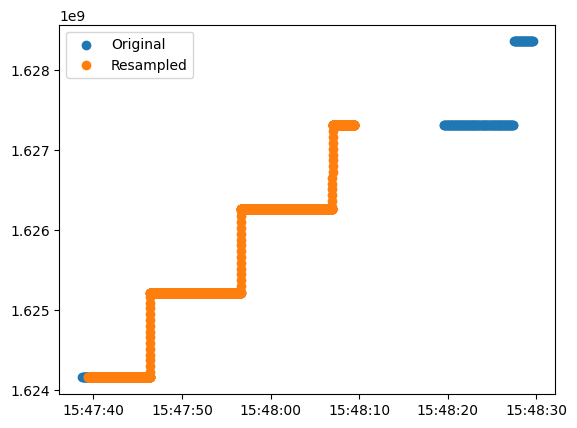

0.9000596192288184


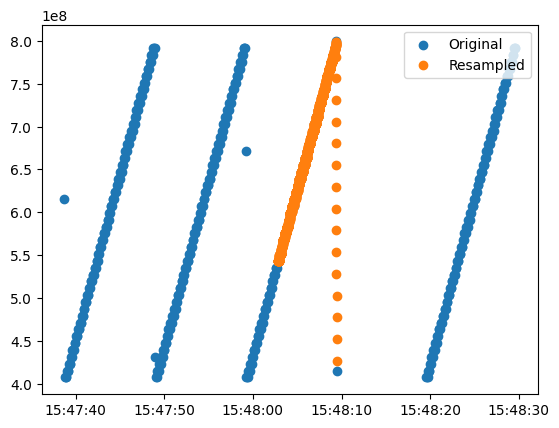

0.978024138191098


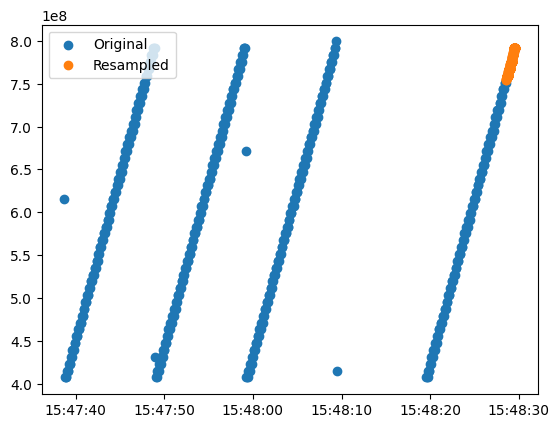

git-166103: Insufficient data for process git with pid 166103
git-166103: Unable to resample 1/1
git-166104: Insufficient data for process git with pid 166104
git-166104: Unable to resample 1/1
git-remote-https-166105: Insufficient data for process git-remote-https with pid 166105
git-remote-https-166105: Unable to resample 1/1
Unable to process 3/387
Abnormal memory usage detected in process: pythonwith pid 149721
Abnormal memory usage detected in process: python3with pid 149854


(['python', 'python3'], [149721, 149854])

In [20]:
mem_mon_gaps.detect_leaks("LBR")

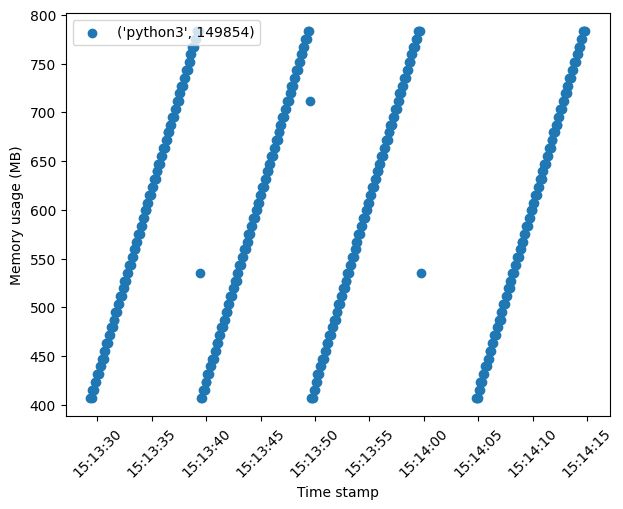

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [18]:
mem_mon_gaps.plot_data_to_screen([proc.pid])